In [1]:
import pandas as pd
import numpy as np

In [2]:
stock_filepath = '../input/faang-stocks-covid190101202004012022/faang_stocks_pandemic_data.csv'
data = pd.read_csv(stock_filepath)
data.head()

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook


In [3]:
# Size of the data
data.shape


(2840, 9)

In [4]:
# column names
data.columns

Index(['Unnamed: 0', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close', 'Name'],
      dtype='object')

In [5]:
# Understand datatype of various variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2840 non-null   int64  
 1   Date        2840 non-null   object 
 2   High        2840 non-null   float64
 3   Low         2840 non-null   float64
 4   Open        2840 non-null   float64
 5   Close       2840 non-null   float64
 6   Volume      2840 non-null   float64
 7   Adj Close   2840 non-null   float64
 8   Name        2840 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 199.8+ KB


In [6]:
# As you noticed by default pandas read Date column as object so we need to
# implicitly specified to pandas that this column is date data type
# There are two ways of doing the same :
# 1) While reading csv file
# 2) Implicity convert object to date 


# 1) While reading csv file
data_faang = pd.read_csv(stock_filepath ,parse_dates=['Date'])
data_faang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2840 non-null   int64         
 1   Date        2840 non-null   datetime64[ns]
 2   High        2840 non-null   float64       
 3   Low         2840 non-null   float64       
 4   Open        2840 non-null   float64       
 5   Close       2840 non-null   float64       
 6   Volume      2840 non-null   float64       
 7   Adj Close   2840 non-null   float64       
 8   Name        2840 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 199.8+ KB


In [7]:
# 2) Implicity convert object to date 

data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2840 non-null   int64         
 1   Date        2840 non-null   datetime64[ns]
 2   High        2840 non-null   float64       
 3   Low         2840 non-null   float64       
 4   Open        2840 non-null   float64       
 5   Close       2840 non-null   float64       
 6   Volume      2840 non-null   float64       
 7   Adj Close   2840 non-null   float64       
 8   Name        2840 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 199.8+ KB


## Data Cleaning/Preprocessing :
    1) Check any Missing/Null value in the data frame?
    2) Removed unwanted columns
    

In [8]:
#1) Check any Missing/Null value in the data frame?
data_faang.isnull().sum()
## There is no missing value in the data

Unnamed: 0    0
Date          0
High          0
Low           0
Open          0
Close         0
Volume        0
Adj Close     0
Name          0
dtype: int64

In [9]:
#2) Removed unwanted columns
data_faang.drop(columns= ['Unnamed: 0'], axis = 1 ,inplace=True)
data_faang.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook


## EDA
    1) How many categorical and continuous variables
    2) statistics understanding of the data

In [10]:
data_cat = data_faang.dtypes =='O'

In [11]:
# 2) statistics understanding of the data
data_faang.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03,2840.000000
mean,1209.156423,1180.196246,1195.034564,1194.873321,3.099634e+07,1194.732621
std,1212.303369,1185.486963,1199.645063,1198.823284,5.338770e+07,1198.950567
min,57.125000,53.152500,57.020000,56.092499,4.656000e+05,55.332169
25%,232.245003,224.582500,228.807503,229.680000,2.771200e+06,229.680000
50%,508.634995,495.050003,502.580002,502.234985,5.637150e+06,502.234985
75%,2376.017517,2322.380005,2361.729980,2352.322449,2.657248e+07,2352.322449
max,3773.080078,3696.790039,3744.000000,3731.409912,4.265100e+08,3731.409912


In [12]:
data_faang.Name.value_counts()

Facebook    568
Amazon      568
Apple       568
Netflix     568
Google      568
Name: Name, dtype: int64

In [13]:
# Filtering of the data
Amazon_data = data_faang[data_faang.Name == 'Amazon']
Amazon_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
568,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000.0,1898.010010,Amazon
569,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400.0,1874.969971,Amazon
570,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800.0,1902.880005,Amazon
571,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900.0,1906.859985,Amazon
572,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000.0,1891.969971,Amazon


## Visualization 

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    


In [14]:
import matplotlib.pyplot as plt

#You'll also need to use this line to see plots in the notebook:
%matplotlib inline

#That line is only for jupyter notebooks, if you are using another editor, you'll use: plt.show()
#at the end of all your plotting commands to have the figure pop up in another window.

In [15]:
import seaborn as sns
%matplotlib inline

# Univariant Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Low', ylabel='Density'>

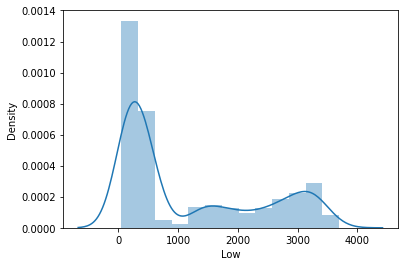

In [16]:
sns.distplot(data_faang['Low'])

<AxesSubplot:xlabel='High', ylabel='Count'>

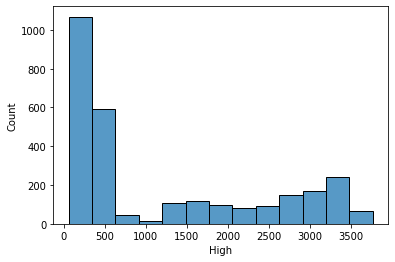

In [17]:
sns.histplot(data_faang['High'])

# Boxplot
    1) To detect outlier in the data

<AxesSubplot:>

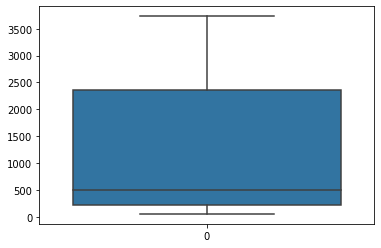

In [18]:
sns.boxplot(data=data_faang['Adj Close'])

# Bivariant Analysis

## Line Chart

<AxesSubplot:xlabel='Date', ylabel='Open'>

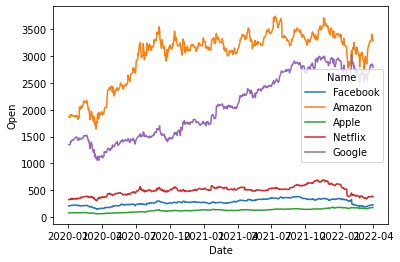

In [19]:
sns.lineplot(data = data_faang , x = 'Date' , y ='Open' , hue= 'Name')


<AxesSubplot:xlabel='Date', ylabel='Close'>

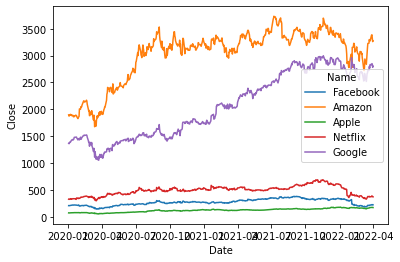

In [20]:
sns.lineplot(data = data_faang , x = 'Date' , y ='Close' , hue= 'Name')

## BarPlot

<AxesSubplot:xlabel='Name', ylabel='Volume'>

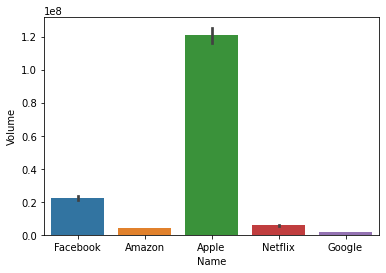

In [21]:
# Barplot
sns.barplot(data = data_faang , x = 'Name' , y ='Volume')

## HeatMap

<AxesSubplot:>

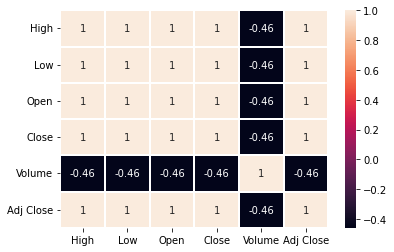

In [22]:
## Heatmap : To find correlation between given variables

data_corr = data_faang.corr()
sns.heatmap(data_corr , annot= True,linewidths=0.1)

## ScatterPlot

<AxesSubplot:xlabel='High', ylabel='Low'>

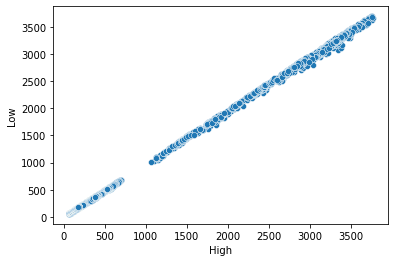

In [23]:
# scatterplot:
sns.scatterplot(x = data_faang.High , y = data_faang.Low)

## PairPlot

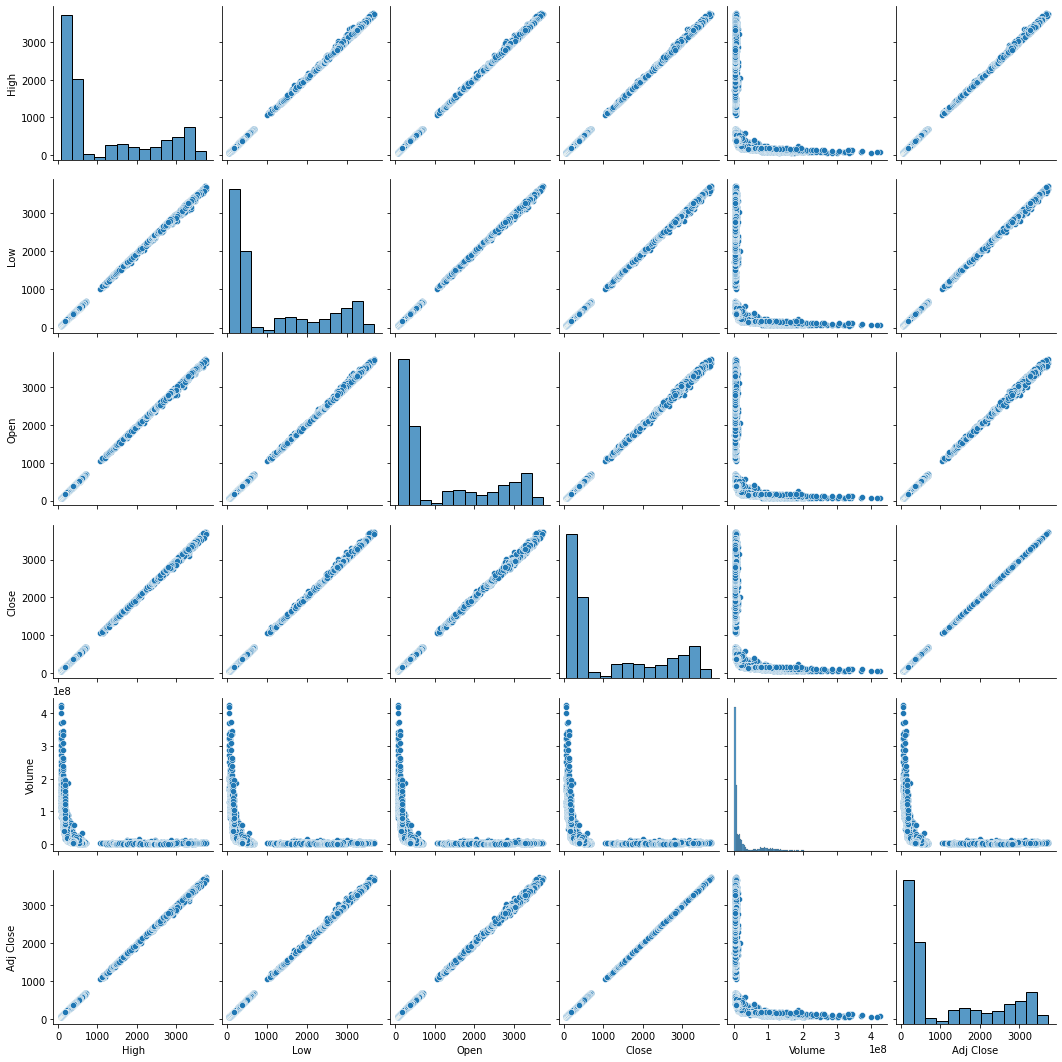

In [24]:
sns.pairplot(data_faang)

<AxesSubplot:xlabel='Name', ylabel='High'>

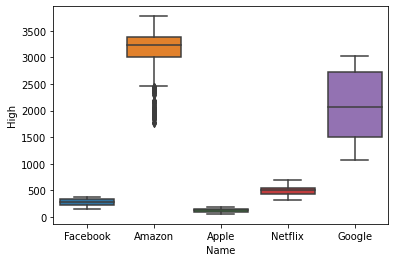

In [25]:
# Boxplot 

sns.boxplot(data= data_faang , x = 'Name' , y = 'High')

<AxesSubplot:xlabel='Name', ylabel='Volume'>

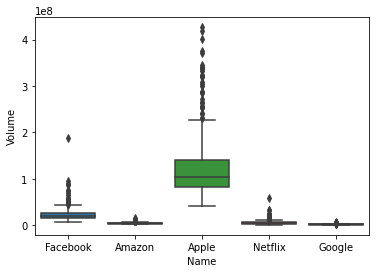

In [26]:
# Boxplot 

sns.boxplot(data= data_faang , x = 'Name' , y = 'Volume')

**Feature Engineering¶**

 Q) **Which company is generating maximum revenue in stock market¶**


<BarContainer object of 5 artists>

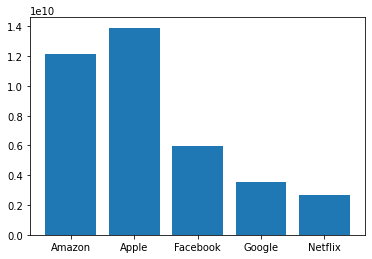

In [27]:
data_faang['mean'] = (data_faang['High']+data_faang['Low'])/2
data_faang['Total_revenue'] = data_faang['Volume']*data_faang['mean']
max_rev = data_faang.groupby(['Name'])['Total_revenue'].mean()
max_rev = pd.DataFrame(max_rev)
max_rev = max_rev.reset_index()
plt.bar(max_rev['Name'] , max_rev['Total_revenue'])

 **which day of the week on average has maximum stock volume¶**

<BarContainer object of 5 artists>

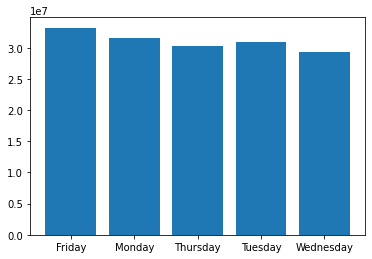

In [28]:
data_faang['day'] = data_faang['Date'].dt.day_name()

max_rev = data_faang.groupby(['day'])['Volume'].mean()
max_rev = pd.DataFrame(max_rev)
max_rev = max_rev.reset_index()
plt.bar(max_rev['day'] , max_rev['Volume'])

**Q) Yearwise Revenue per company¶**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='Total_revenue'>

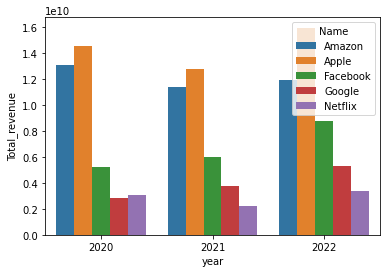

In [29]:
data_faang['year'] = data_faang['Date'].dt.year
data_faang.head()
max_rev = data_faang.groupby(['year','Name'])['Total_revenue'].mean()
max_rev = pd.DataFrame(max_rev)
max_rev = max_rev.reset_index()
sns.barplot(max_rev['year'] , max_rev['Total_revenue'] ,hue= max_rev['Name'])

**Q)Each day distribution of volume for each company**

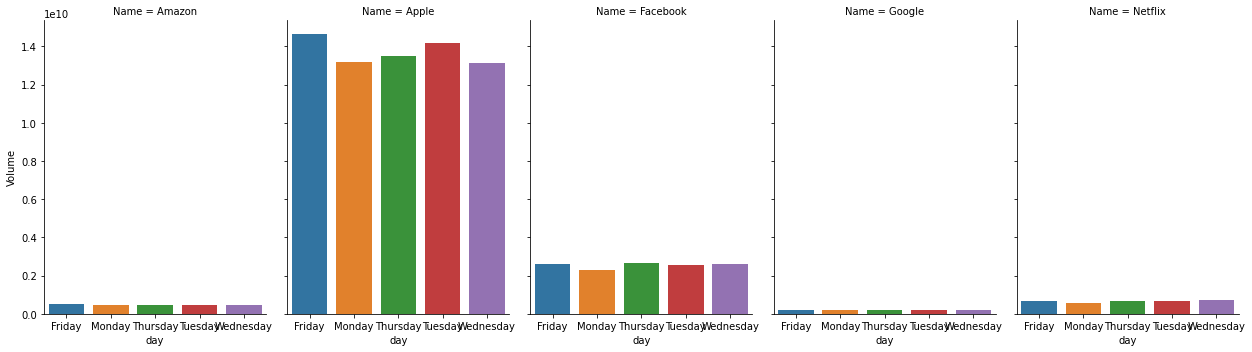

In [30]:
data_faang.head()
df_sum  = data_faang.groupby(['day','Name'])['Volume'].sum()
df_sum = df_sum.reset_index()
df_sum.head()
sns.catplot(x="day" , y= 'Volume' , data = df_sum ,col = 'Name' ,kind='bar',height=5,aspect=0.7)

**Q) Which month is generating max revenue**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='Total_revenue'>

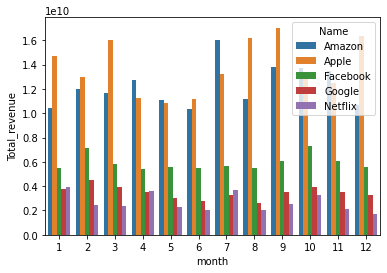

In [31]:
data_faang['month'] = data_faang['Date'].dt.month
data_faang.head()
max_rev = data_faang.groupby(['month','Name'])['Total_revenue'].mean()
max_rev = pd.DataFrame(max_rev)
max_rev = max_rev.reset_index()
sns.barplot(max_rev['month'] , max_rev['Total_revenue'] ,hue= max_rev['Name'])